In [0]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from skimage import exposure
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [0]:
uploaded = files.upload()

In [0]:
df2 = pd.read_csv('train.csv')

In [0]:
(trainData, valData, trainLabels, valLabels) = train_test_split(df2, df2.label, test_size=0.1, random_state=84)

In [7]:
kVals = range(1, 10, 2)
accuracies = []

# loop over kVals
for k in range(1, 10, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    #evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=97.10%
k=3, accuracy=97.19%
k=5, accuracy=97.10%
k=7, accuracy=96.81%
k=9, accuracy=96.74%


In [8]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=3 achieved highest accuracy of 97.19% on validation data


In [0]:
trainData = trainData.drop(['label'],axis=1)
trainData.shape

In [6]:
model = KNeighborsClassifier(kVals[i])
model.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
testDF = pd.read_csv('test.csv')

In [0]:
prediction_table = {'ImageId': [], 'Label': []}

for i in range(len(testDF)):
  image = testDF.iloc[[i]].values
  prediction = model.predict(image)[0]
  prediction_table['ImageId'].append(i)
  prediction_table['Label'].append(prediction)

In [0]:
pd.DataFrame(prediction_table).to_csv('Sample_Submision.csv',index=False)

In [0]:
sc = StandardScaler()
normalizedData = sc.fit_transform(df2)

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalizedData)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
principalDf['label'] = df2["label"]

Text(0, 0.5, 'Principal component 2')

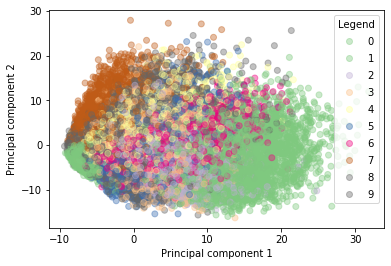

In [87]:
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c = df2['label'], alpha=0.4, cmap=plt.cm.get_cmap('Accent', 10))

plt.legend(*scatter.legend_elements(), title="Legend")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')